In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [37]:
data_red = pd.read_csv('winequality-red.csv')
data_white = pd.read_csv('winequality-white.csv')

In [38]:
data_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [39]:
data_red = data_red.set_axis(['old'],axis=1, inplace = False)
data_red.head()

,old
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [40]:
data_red = data_red['old'].str.split(';', expand=True)

In [41]:
cols = data_white.columns.values
col = np.array2string(data_white.columns.values).split(';')
s = []
for c in col:
    s.append(re.sub((r'\W+'), '',c))

In [42]:
data_red = data_red.set_axis(s,axis=1,inplace = False)

In [43]:
data_red.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [44]:
data_red[s] = data_red[s].astype(float) #covert string data to numerical data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# separate the data into training and response
X = data_red.drop('quality', axis=1)
y = data_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
# rescaling using standardized scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
from sklearn import linear_model

In [58]:
# run linear regression model 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#reg.coef_

0.4364325417954994


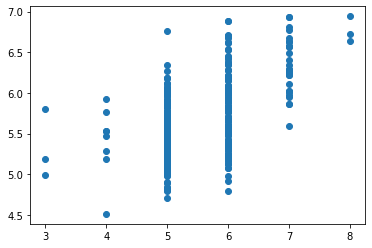

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
# mean square error 
print(mean_squared_error(y_test, y_pred))
# y vs ypred
plt.scatter(y_test, y_pred)
plt.show()

# so it's pretty bad

In [92]:
# using gradient descent
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred_gd = clf.predict(X_test)

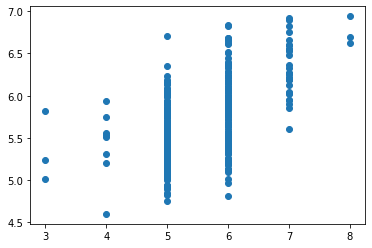

0.43477295728827114


In [94]:
plt.scatter(y_test, y_pred_gd)
plt.show()

print(mean_squared_error(y_test, y_pred_gd))